----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<h1><center>
    
Practical exam on Computer Vision
 
( November, 8th, 2021 )
</center></h1>    

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


This is the practical exam that should be developed during 2 hours. Note that to approve the exam, both parts (theoretical and practical ones) should be approved. Each exercise is defined with the corresponding score. 

## Exercise 1

### I am Iron Man

The billionaire Tony Stark is, also, the well known super-hero Ironman. After an unfortunate incident, Ironman lost his helm on the battleground. Today, we must help him to recover it. 

<img src="images/stark_and_helm.png" width="600" height="60">

### Ex.1.1) (0.5 points) Load the image `Ironman.jpg` together with the  image `helm.jpg` from the folder `images`. Show both images in one single figure using the `subplots` function and print their principal image features: type and shape.


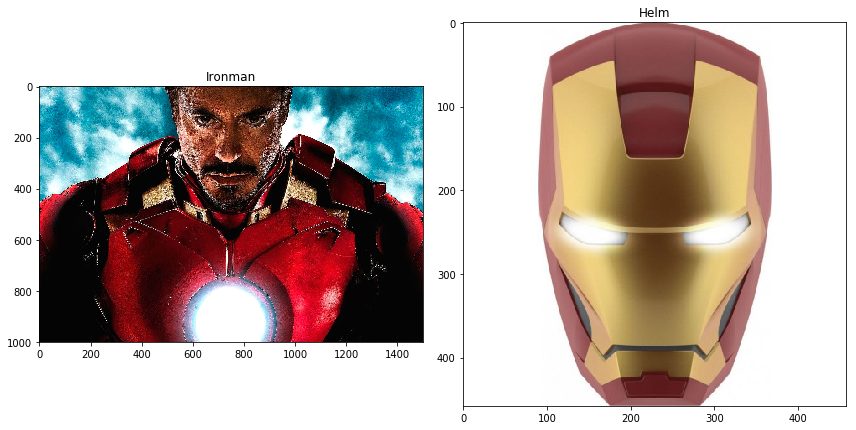

Ironman features: (1000, 1500, 3) uint8
Helm features: (458, 458, 3) uint8


In [2]:
## Your solution here!
import numpy as np
from skimage import io, color, exposure
from matplotlib import pyplot as plt

ironman = io.imread('images/Ironman.jpg')
helm = io.imread('images/helm.jpg')

# Show images using subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(ironman)
ax[0].set_title("Ironman")
ax[1].imshow(helm)
ax[1].set_title("Helm")

fig.tight_layout() # Perque no es tallin els títols
plt.show()

print("Ironman features:", ironman.shape, ironman.dtype)
print("Helm features:", helm.shape, helm.dtype)

### Ex.1.2) (2.5 points) Put the helm on the head. 

Firstly, note differences in size between both, Ironman and helm. We need to compensate these differences by rescaling one of the images.

In order to overlap the helm on the head, we need to obtain a binary mask from the helm. Note that the image background is not homogeneous and, therefore, we need to apply a threshold to separate the helm from the background. 

The result should look like:

<img src="images_notebook/ironmen.png" width="750" height="135">



Ironman features: (1000, 1500, 3) uint8
Helm features: (458, 458, 3) uint8


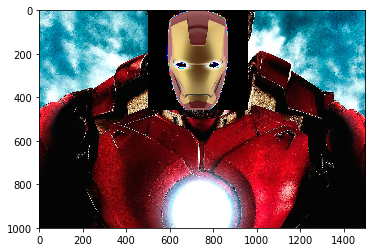

In [8]:
# your solution
# Apply to the model
from skimage.color import rgb2gray
print("Ironman features:", ironman.shape, ironman.dtype)
print("Helm features:", helm.shape, helm.dtype)

y_i, y_f = 0, helm.shape[0]
x_i, x_f = 500, helm.shape[0] + 500

background = np.copy(helm)
background[:,:,:] = 0
new_helm = np.where(helm > 250, background, helm)

ironman[y_i:y_f, x_i:x_f,:] = new_helm

# Un poco más de tiempo lo acabaría
# ironman_face = ironman[y_i:y_f, x_i:x_f,:]
# ironman_face = np.where(new_helm != 0, new_coat, ironman_face)

# ironman[y_i:y_f, x_i:x_f,:]
# ironman[y_i:y_f, x_i:x_f,:] = new_helm
# plt.imshow(new_helm)

plt.imshow(ironman)

## Exercise 2

In all the movies and series, there are several characters and we need to separate each one to understand the argument. 

In this exercise, we are going to segment each character from an image.

### Ex.2.1) (2 points) Load the image ``dune.jpeg`` and visualize it. Segment the image using the Felzenszwalb algorithm and determine which set of parameters is better: 

* parameters by default,
* scale=50, sigma=2, min_size=500 or
* scale=100, sigma=0.5, min_size=500. 

What are the different parameters doing?

Visualize the original image, and the results of the segmentation in the same figure.

The result should look like:

<img src="images_notebook/falzenswalb.png" width="750" height="135">

Comment the results.


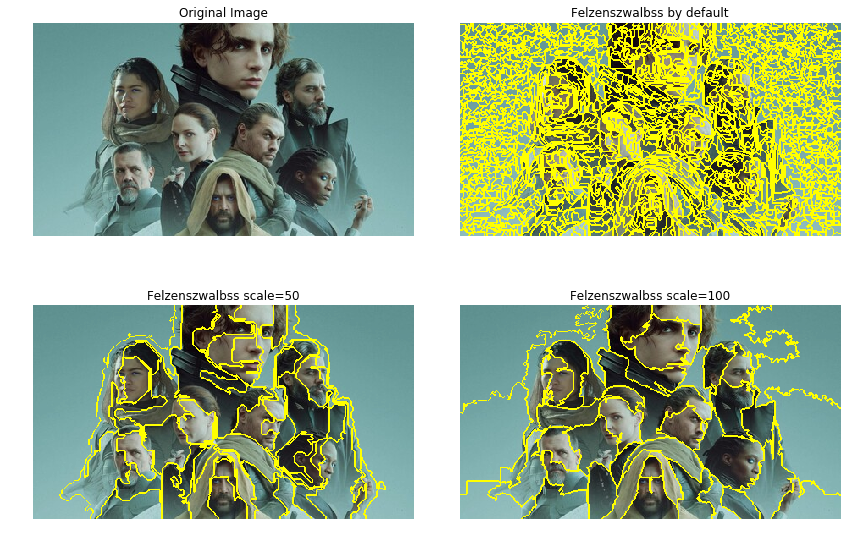

In [9]:
# your solution
from skimage.segmentation import felzenszwalb, slic, quickshift
from skimage.segmentation import mark_boundaries

%matplotlib inline
# We read the image
dune = io.imread("images/dune.jpeg")

# Let's to apply the algorithm
segments_fz1 = felzenszwalb(dune) # default scale=1, sigma=0.8, min_size=20
segments_fz2 = felzenszwalb(dune, scale=50, sigma=2, min_size=500)
segments_fz3 = felzenszwalb(dune, scale=100, sigma=0.5, min_size=500)

# Show images using subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(dune)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(mark_boundaries(dune, segments_fz1))
ax[1].set_title('Felzenszwalbss by default')
ax[1].axis('off')
ax[2].imshow(mark_boundaries(dune, segments_fz2))
ax[2].set_title('Felzenszwalbss scale=50')
ax[2].axis('off')
ax[3].imshow(mark_boundaries(dune, segments_fz3))
ax[3].set_title('Felzenszwalbss scale=100')
ax[3].axis('off')

plt.tight_layout()
plt.show()

**R:** The scale setted by default (scale=1) is too low for this image, producing an oversegmentation, as we can see on the second image. <br>
When we modifying the scale, we can control the number of produced segments and their size. Higher scale means less and larger segments. <br>
As wee can see, after set scale=50 (third image) we can observe less and larger segments. <br>
At the fourth image, after increase scale=100  we can observe even less and larger segments. <br>
We can also notice that the sigma=2 at the third image produces more smoothed clusters boundaries and avoid background segmentation. <br>
The Felzenszwalbss with scale=50 and sigma=2 perfomed better for this image.

### Ex.2.2) (1.5 points) Segment the image using the SLIC algorithm and determine which set of parameters is better: 

* n_segments=50, compactness=10, sigma=1; or
* n_segments=250, compactness=5, sigma=3. 

Visualize the original image and the result of the segmentation in the same figure (using subplots).

What are the different parameters doing?

The result should look like:

<img src="images_notebook/slic.png" width="850" height="135">

Comment the results.

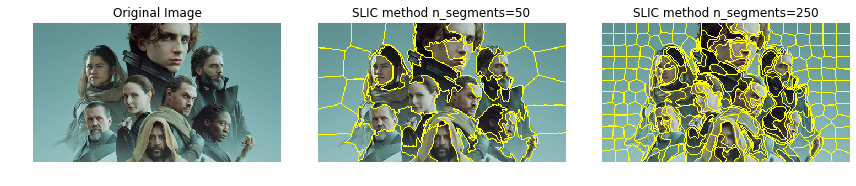

In [10]:
# your solution

# Apply slic algorithm
segments_slic1 = slic(dune, n_segments=50, compactness=10, sigma=1, start_label=1)
segments_slic2 = slic(dune, n_segments=250, compactness=5, sigma=3, start_label=1)

# Show images using subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(dune)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(mark_boundaries(dune, segments_slic1))
ax[1].set_title('SLIC method n_segments=50')
ax[1].axis('off')
ax[2].imshow(mark_boundaries(dune, segments_slic2))
ax[2].set_title('SLIC method n_segments=250')
ax[2].axis('off')

plt.tight_layout()
plt.show()

**R:**
As wee increase the number of segments, the result will have more segments. <br>
At the third image, the number of segments setted is too high, producing an oversegmentation. <br>
The compactness paramater balances color proximity and space proximity. Higher values give more weight to space proximity. We can observe that color proximity is very relevant to this image. <br>
The SLIC with n_segments=50, compactness=10, sigma=1 perfomed better for this image and could segment the persons satisfactorily.

### Ex.2.3) (2 points) Apply the Canny edge detector and overlap it on the original image as follows



<img src="images_notebook/canny.png" width="850" height="135">

Comment the different results.

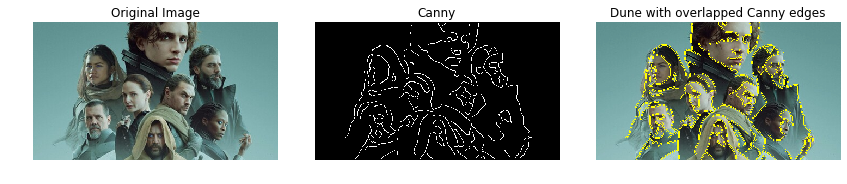

In [11]:
from skimage import feature # feature.canny
from skimage.color import rgb2gray

# your solution

# Convert image to grayscale and apply Canny
gray = rgb2gray(dune)
canny = feature.canny(gray, sigma=3, low_threshold=0.1,high_threshold=0.2)

# Show images using subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(dune)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(canny, cmap='gray')
ax[1].set_title('Canny')
ax[1].axis('off')
ax[2].imshow(mark_boundaries(dune, canny))
ax[2].set_title('Dune with overlapped Canny edges')
ax[2].axis('off')

plt.tight_layout()
plt.show()

**R:** The Canny could the extract important contourns but we can notice some of discotinued lines.

## Exercise 3 

### Let's play Green Light, Red Light


"You have only one oportunity to live..." Or not? 

In the Squid Game, a giant doll presides the Green Ligth, Red Ligth game. When the doll turns its head around, everybody must be still. All those people, that are in movement, will be "removed".

We are going to confuse the doll by anonymizing the images, in order to save people.

<img src="images/doll.jpg" width="400" height="40">

### Ex.3.1) (0.5 point) Load the image collection from  `images\green_light\` and visualize the video

**hint** remember to use %matplotlib nbagg

In [16]:
#your solution
from skimage import io
from matplotlib import pyplot as plt, animation as anim

%matplotlib nbagg 

imgs = io.collection.ImageCollection('images/green_light/*.jpg') #add your solution

total_frames = len(imgs)
def frame_update(frame_num):
    act_img.set_array(imgs[frame_num])
    return act_img

<IPython.core.display.Javascript object>


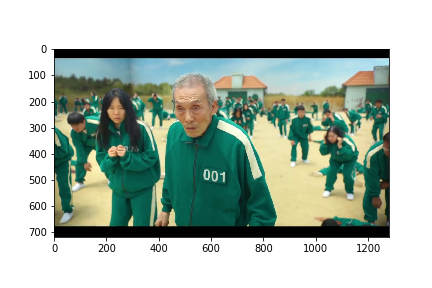

In [17]:
# Non-blurred video
fig = plt.figure()
act_img = plt.imshow(imgs[0], animated = True)
ani = anim.FuncAnimation(fig, frame_update, frames = total_frames, interval = 20, repeat = False)
plt.show()

### Ex.3.2) (1 point) Use a gaussian kernel to smooth the images in order to anonymize the faces. Visualize the smoothed video images. What parameters did you use in order to anonymize faces?

<IPython.core.display.Javascript object>


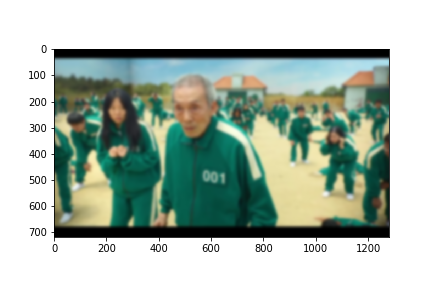

In [18]:
# your solution
from skimage.filters import gaussian
def frame_update(frame_num):
    act_img.set_array(gaussian(imgs[frame_num], sigma=5, multichannel=True))
    return act_img

fig = plt.figure()
act_img = plt.imshow(imgs[0], animated = True)
ani = anim.FuncAnimation(fig, frame_update, frames = total_frames, interval = 20, repeat = False)
plt.show()